<center style="font-size: 26px"> <b>Проверка уровня знаний Python</b></center>

In [ ]:
# обеспечиваем совместимость с Python 2 и 3
from __future__ import (absolute_import, division, print_function, unicode_literals)

# отключаем предупреждения дистрибутива Anaconda
import warnings
warnings.simplefilter('ignore')

**Описание датасета:**   
[Датасет вакансий с платформы HH.ru на Kaggle.com](https://www.kaggle.com/datasets/pavfedotov/heaadhunter-vacancies?resource=download&select=df2021-08-03.csv) 

Нужный файл - df2021-08-03.csv.

- *vacancy* - наименование вакансии
- *url* - ссылка на вакансию
- *created* - дата и время создания
- *has_test* - наличие тестового задания в вакансии
- *salary_from* - нижняя граница значения заработной платы
- *salary_to* - верхняя граница значения заработной платы
- *currency* - валюта заработной платы
- *experience* - требуемый опыт
- *schedule* - тип рабочего графика
- *skills* - требуемые навыки
- *employer* - наименование работодателя
- *area* - наименование города
- *description* - описание вакансии

#### Загрузите датасет

In [ ]:
import pandas as pd
import datetime as dt
import xml.etree.ElementTree as et
import requests
import time

In [ ]:
df = pd.read_csv('df2021-08-03.csv')
df.head(1)

,vacancy,url,created,has_test,salary_from,salary_to,currency,experience,schedule,skills,employer,area,description
0,Backend/Full-stack developer (python),https://hh.ru/applicant/vacancy_response?vacan...,2021-08-01T13:02:48+0300,False,120000.0,NaN,RUR,От 1 года до 3 лет,Гибкий график,Python;PostgreSQL;Linux;Flask;,ATI.SU,Санкт-Петербург,Привет! Мы ATI.SU ― крупнейшая в России компан...


### Практические задания:

#### 1. Изучите методы для сбора данных курсов валют в [API Центрального банка Российской Федерации](https://www.cbr.ru/development/SXML/) . Используя запросы к API, приведите значения заработной платы к рублям одним из вариантов: 1) простой вариант - на текущую дату  2) вариант посложнее - на дату создания (created).

In [ ]:
df.currency.value_counts()
# Проверяем наличие других валют

RUR    584
USD     15
EUR     14
Name: currency, dtype: int64

In [ ]:
def parse_currency(cur, year, month, day):
    result = {}
 
  
    get_xml = requests.get(
        'http://www.cbr.ru/scripts/XML_daily.asp?date_req=%s/%s/%s' % (day, month, year)
    )

    # Парсинг XML используя ElementTree
    structure = ET.fromstring(get_xml.content)
    

    if cur == 'USD':
      try:
          # Поиск курса доллара 
          dollar = structure.find("./*[@ID='R01235']/Value")
          result['dollar'] = dollar.text.replace(',', '.')
      except:
          result['dollar'] = 'x'
    if cur == 'EUR':
      try:
          # Поиск курса евро
          euro = structure.find("./*[@ID='R01239']/Value")
          result['euro'] = euro.text.replace(',', '.')
      except:
          result['euro'] = 'x'
    return result

In [ ]:
i = 0
ind = df.loc[df.currency == 'USD'].created.index
for date in df.loc[df.currency == 'USD'].created:
  result = parse_currency('USD', date[0:4], date[5:7], date[8:10])
  if pd.isna(df.salary_from[ind[i]]) is False:
    df.loc[ind[i], 'salary_from'] = df.salary_from[ind[i]] * float(result['dollar'])
  if pd.isna(df.salary_to[ind[i]]) is False:
    df.loc[ind[i], 'salary_to'] = df.salary_to[ind[i]] * float(result['dollar'])
  df.loc[ind[i], 'currency'] = 'RUR'
  time.sleep(1)
  i+=1
# парсинг для доллара

In [ ]:
i = 0
ind = df.loc[df.currency == 'EUR'].created.index
for date in df.loc[df.currency == 'EUR'].created:
  result = parse_currency('EUR', date[0:4], date[5:7], date[8:10])
  if pd.isna(df.salary_from[ind[i]]) is False:
    df.loc[ind[i], 'salary_from'] = df.salary_from[ind[i]] * float(result['euro'])
  if pd.isna(df.salary_to[ind[i]]) is False:
    df.loc[ind[i], 'salary_to'] = df.salary_to[ind[i]] * float(result['euro'])
  df.loc[ind[i], 'currency'] = 'RUR'
  time.sleep(1)
  i+=1
# парсинг для евро

#### 2. Найдите вакансию с самой высокой заработной платой, где подойдет 4 года опыта работы и не нужно проходить тестовое задание.

In [ ]:
df[df.salary_to == df.loc[(df.experience != 'От 1 года до 3 лет') & (df.has_test == False)].salary_to.max()]
# получилось 7 вакансий

vacancy        7
url            7
created        7
has_test       7
salary_from    6
salary_to      7
currency       7
experience     7
schedule       7
skills         7
employer       7
area           7
description    7
dtype: int64

#### 3. Сделайте рейтинг (топ-30) навыков по всем вакансиям.

In [ ]:
df.skills = df.skills.fillna('')
lst = []
for skill in range(len(df)):
  lst.extend(df.skills[skill].split(';'))
# перемещаю все скиллы в список по разделителю

In [ ]:
from collections import Counter
dct = Counter(lst)
top_skill = pd.DataFrame(dct.items(), columns=['skill', 'count'])
# создаю словарь на основе списка и далее датафрейм

In [ ]:
top_skill.nlargest(30, 'count')

,skill,count
4,,1700
0,Python,1442
5,Git,586
24,SQL,501
1,PostgreSQL,499
9,Django Framework,467
2,Linux,463
3,Flask,177
29,Docker,172
18,JavaScript,149


#### 4. Cоставьте топ-10 городов с наибольшей средней заработной платой по вакансиям тестировщика (QA).

In [ ]:
df[df['vacancy'].str.contains('QA')].groupby('area').mean().nlargest(10, ['salary_to'])

<ipython-input-250-08b139db7495>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['vacancy'].str.contains('QA')].groupby('area').mean().nlargest(10, ['salary_to'])


,has_test,salary_from,salary_to
area,,,
Тамбов,0.000000,150000.000000,250000.000000
Санкт-Петербург,0.047619,151250.000000,209285.714286
Москва,0.000000,162857.142857,187142.857143
Казань,0.000000,90000.000000,NaN
Новосибирск,0.000000,NaN,NaN
Самара,0.000000,NaN,NaN
Саратов,0.000000,NaN,NaN


#### 5. Покажите динамику количества вакансии по месяцам даты создания.

In [ ]:
format_date = '%Y-%m-%dT%H:%M:%S+0300'
format_date_now = '%Y-%m-%d'

In [ ]:
df.created = df.created.apply(lambda x: dt.datetime.strptime(x, format_date))
# изменил дату из типа str в datetime для удобной работы

<Axes: xlabel='created'>

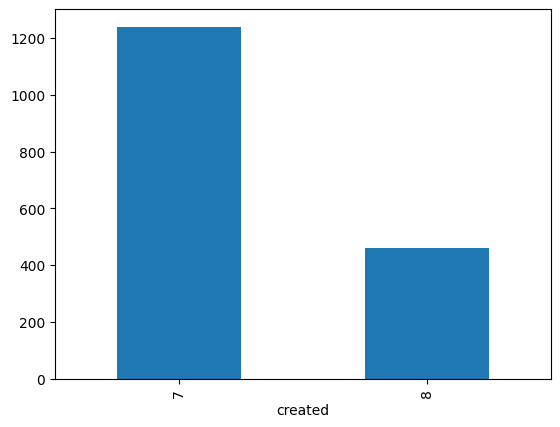

In [ ]:
df.groupby(df["created"].dt.month).vacancy.count().plot(kind="bar")

#### 6. Напишите функцию для поиска вакансий по переданным в нее значениям заработной платы, наличия тестового задания, наличия заданного текста в наименовании вакансии, наличия заданного навыка. В результате выведите количество найденных вакансий, среднюю заработную плату по найденным вакансиям и список ссылок найденных вакансий. 

In [ ]:
def search_vacancy(salary, test, text, skill):
  result = df[df['vacancy'].str.contains(text)]
  result = result[result['skills'].str.contains(skill)]
  result = result.loc[(result.has_test == test) & (result.salary_from <= salary) & (result.salary_to >= salary)]
  print('Количество вакансий: ', result.vacancy.count())
  print(result.groupby('vacancy').salary_to.mean())
  print(list(result.url))
search_vacancy(170000, False, 'Backend', 'Git')


Количество вакансий:  8
vacancy
Backend - разработчик (Python)                                    220000.0
Backend Developer Middle (Python)                                 170000.0
Backend Python Developer (middle, team lead )                     200000.0
Backend Senior разработчик Python / ведущий разработчик           300000.0
Backend-разработчик (Python)                                      250000.0
Middle Backend Developer (Web app, Python, FastAPI) / Удаленно    210000.0
Web-разработчик / Backend программист Python                      180000.0
Name: salary_to, dtype: float64
['https://hh.ru/applicant/vacancy_response?vacancyId=46614391', 'https://hh.ru/applicant/vacancy_response?vacancyId=46124734', 'https://hh.ru/applicant/vacancy_response?vacancyId=43615645', 'https://hh.ru/applicant/vacancy_response?vacancyId=45125964', 'https://hh.ru/applicant/vacancy_response?vacancyId=45973716', 'https://hh.ru/applicant/vacancy_response?vacancyId=45872271', 'https://hh.ru/applicant/vacancy

#### *Необязательно*. Усложненный вариант - сделать атрибуты функции опциональными, чтобы иметь возможность фильтрации вакансий по любой комбинации условий.

In [ ]:
# не разобрался что-то ^-^